## Acclimatising numerical data

Import the necessary libraries.

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

##### Load the `mlready.csv` into the variable `credit_df`.

In [2]:

#The file has been already cleaned and optimized for machine learning in Tableau Prep. 'null' values removed, snake casing and target variable changed to boolean

credit_df = pd.read_csv("C:\\Users\\San\\Documents\\Mid-Project\\ML-Classification\\Data_Cleaning\mlready.csv")

First look at its main features (head, shape, info).

In [3]:
credit_df.head(6)

,customer_number,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669,877,1095,1002
1,2,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78,366
2,3,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367,352,145,242
3,4,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578,1760,1119,419
4,5,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140,1357,982,365
5,6,0,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847,1365,750,497


In [4]:
credit_df.shape

(17976, 17)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17976 non-null  int64  
 1   offer_accepted        17976 non-null  int64  
 2   reward                17976 non-null  object 
 3   mailer_type           17976 non-null  object 
 4   income                17976 non-null  object 
 5   accounts_open         17976 non-null  int64  
 6   overdraft_protection  17976 non-null  object 
 7   credit_rating         17976 non-null  object 
 8   cards_held            17976 non-null  int64  
 9   homes_owned           17976 non-null  int64  
 10  household_size        17976 non-null  int64  
 11  own_your_home         17976 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  int64  
 14  q2_balance            17976 non-null  int64  
 15  q3_balance         

In [6]:
#Check NaNs Total, just reconfirming. 'Nulls' have been removed already.
credit_df.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income                  0
accounts_open           0
overdraft_protection    0
credit_rating           0
cards_held              0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [7]:
credit_df.describe()

,customer_number,offer_accepted,accounts_open,cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,0.056798,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.958865,0.231463,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4498.750000,0.000000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,0.000000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13501.250000,0.000000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,1.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [8]:
#too much of 0 in quarterly balances? Let's check the no. of 0s

credit_df['q1_balance'].value_counts(sort=False)


0        5
2049     2
16       9
2065     3
32      11
        ..
1967    12
1983     4
1999     8
2015     3
2047     4
Name: q1_balance, Length: 2158, dtype: int64

In [9]:
credit_df['q2_balance'].value_counts(sort=False)

0       1
16      9
32      7
48      1
64      8
       ..
1887    2
1919    1
1951    1
1967    2
1999    1
Name: q2_balance, Length: 1945, dtype: int64

In [10]:
credit_df['q3_balance'].value_counts(sort=False)

0       1
2049    2
16      6
2065    5
32      1
       ..
1983    5
1999    2
2015    7
2031    5
2047    5
Name: q3_balance, Length: 2281, dtype: int64

In [11]:
credit_df['q4_balance'].value_counts(sort=False)

0        5
2049     1
16      11
2065     2
32       7
        ..
1983     4
1999     4
2015     4
2031     2
2047     2
Name: q4_balance, Length: 2184, dtype: int64

In [12]:
# There isn't a lot of 0s, so we proceed further.

#We will not need customer_number. Let's drop it.

del credit_df['customer_number']

##### 7. Store continuous data into a continuous variable and do the same for discrete and categorical. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

Check discrete and continuous variables

Only numerical variables can be discrete or continuous

In [13]:
numericals = credit_df.select_dtypes(np.number)
numericals.head()

,offer_accepted,accounts_open,cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,1,2,1,4,1160.75,1669,877,1095,1002
1,0,1,2,2,5,147.25,39,106,78,366
2,0,2,2,1,2,276.50,367,352,145,242
3,0,2,1,1,4,1219.00,1578,1760,1119,419
4,0,1,2,1,6,1211.00,2140,1357,982,365


In [14]:
#the discrete variables will be likely the ones with less unique values exception for customer_number.
numericals.nunique()

offer_accepted        2
accounts_open         3
cards_held            4
homes_owned           3
household_size        8
average_balance    4728
q1_balance         2158
q2_balance         1945
q3_balance         2281
q4_balance         2184
dtype: int64

In [15]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [16]:
discrete

['offer_accepted',
 'accounts_open',
 'cards_held',
 'homes_owned',
 'household_size']

In [17]:
continuous = list(numericals.drop(columns = discrete).columns)

In [18]:
continuous

['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

In [19]:
credit_df.head()

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669,877,1095,1002
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78,366
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367,352,145,242
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578,1760,1119,419
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140,1357,982,365


##### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

In [20]:
categorical = credit_df.select_dtypes(object)

In [21]:
categorical.nunique()

reward                  3
mailer_type             2
income                  3
overdraft_protection    2
credit_rating           3
own_your_home           2
dtype: int64

In [22]:
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

In [23]:
#no customer_id anymore
categorical_columns

['reward',
 'mailer_type',
 'income',
 'overdraft_protection',
 'credit_rating',
 'own_your_home']

In [24]:
categorical_df=credit_df[categorical_columns]

##### 9. Get categorical features.

In [25]:
categorical_df

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...
17971,Cash Back,Letter,High,No,Low,Yes
17972,Cash Back,Letter,High,No,Low,Yes
17973,Cash Back,Letter,High,No,Low,No
17974,Cash Back,Letter,Medium,No,Medium,Yes


## Cleaning categorical data

##### Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [26]:
continuous_df = numericals.drop(columns = discrete)

In [27]:
continuous_df.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669,877,1095,1002
1,147.25,39,106,78,366
2,276.50,367,352,145,242
3,1219.00,1578,1760,1119,419
4,1211.00,2140,1357,982,365


In [28]:
discrete_df = numericals[discrete]

In [29]:
discrete_df

,offer_accepted,accounts_open,cards_held,homes_owned,household_size
0,0,1,2,1,4
1,0,1,2,2,5
2,0,2,2,1,2
3,0,2,1,1,4
4,0,1,2,1,6
...,...,...,...,...,...
17971,0,1,1,1,5
17972,0,1,3,1,3
17973,0,1,2,1,4
17974,0,1,4,2,2


##### Plot a correlation matrix, what can you see?

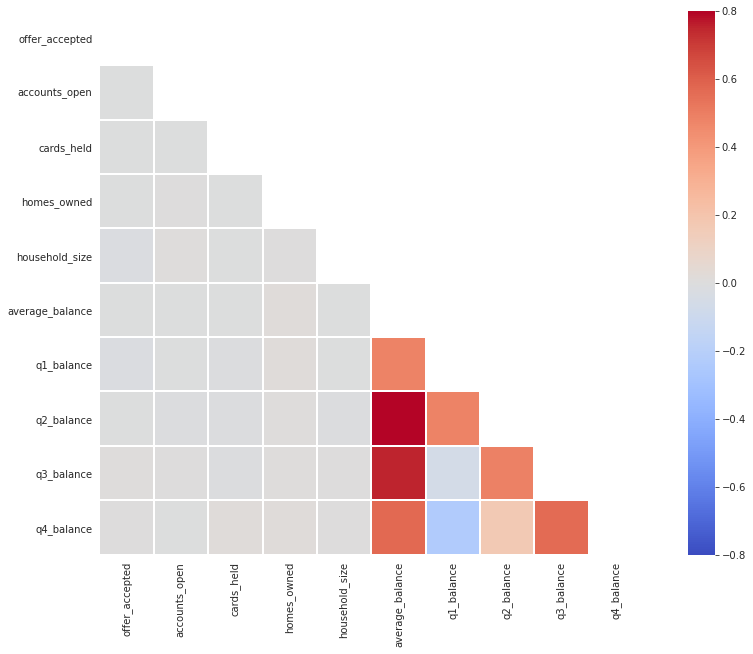

In [30]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

### Discrete

##### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [31]:
# Create function to print barplots from discrete data

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

#The enumerate() method adds counter to an iterable and returns it (the enumerate object).

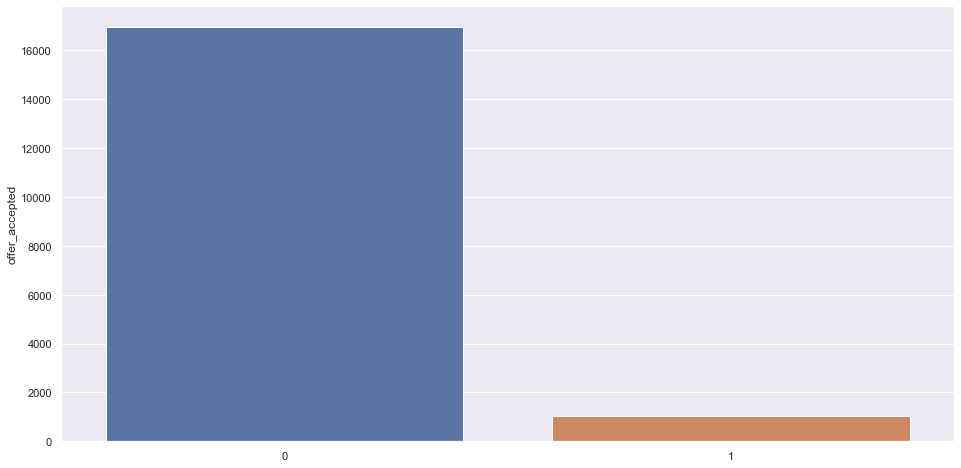

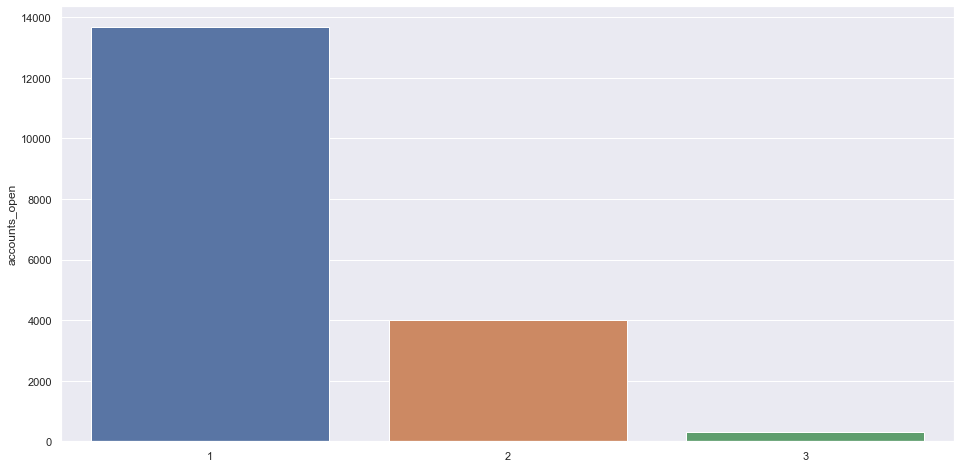

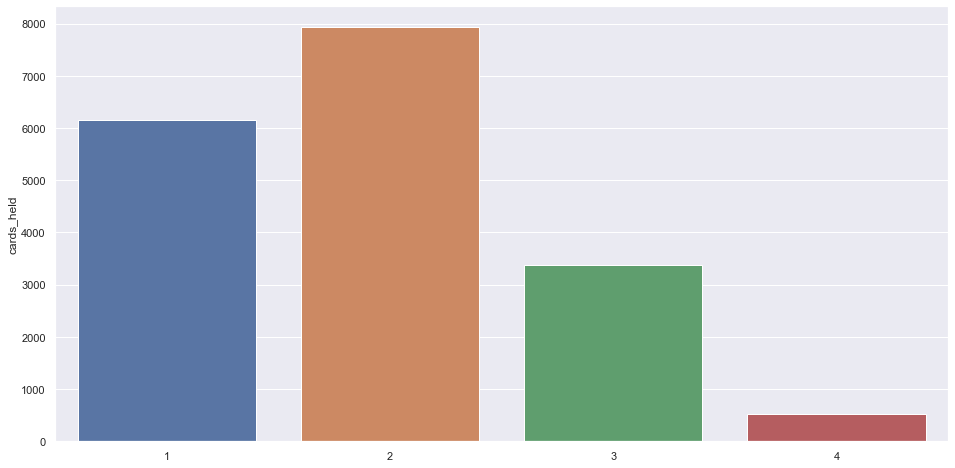

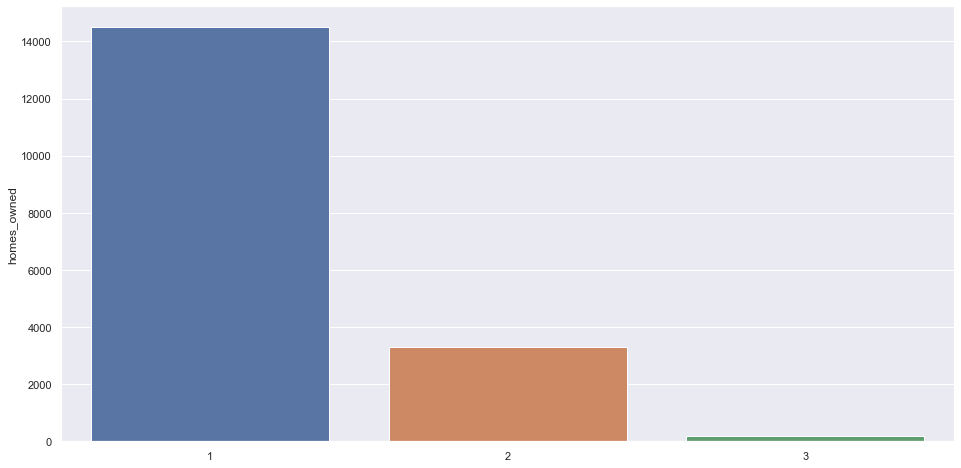

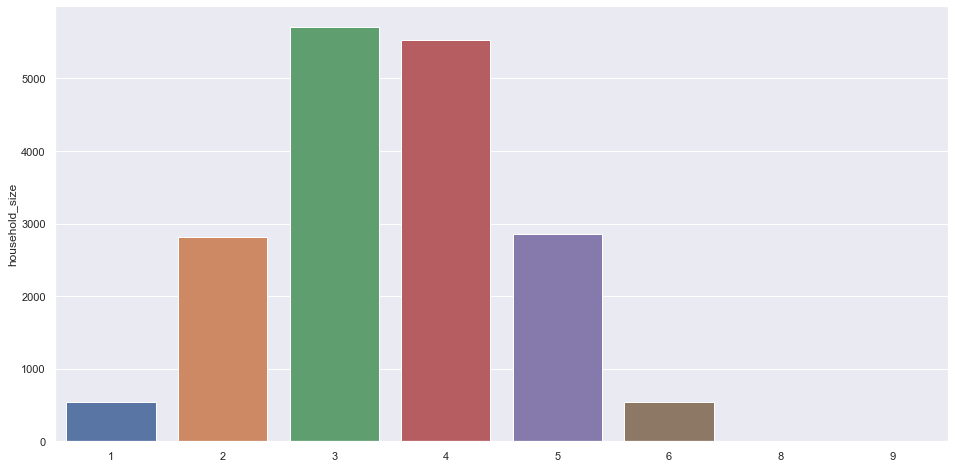

In [32]:
df_bar(discrete_df)

### Continuous

In [33]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

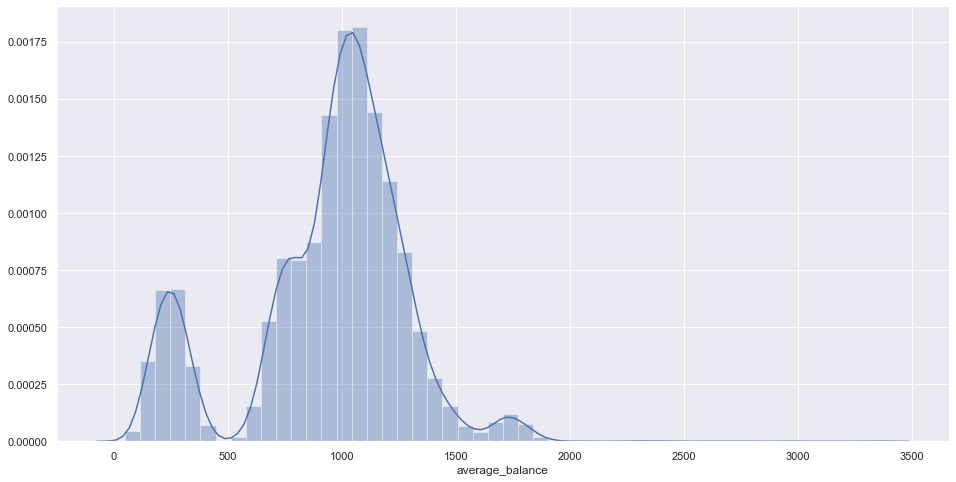

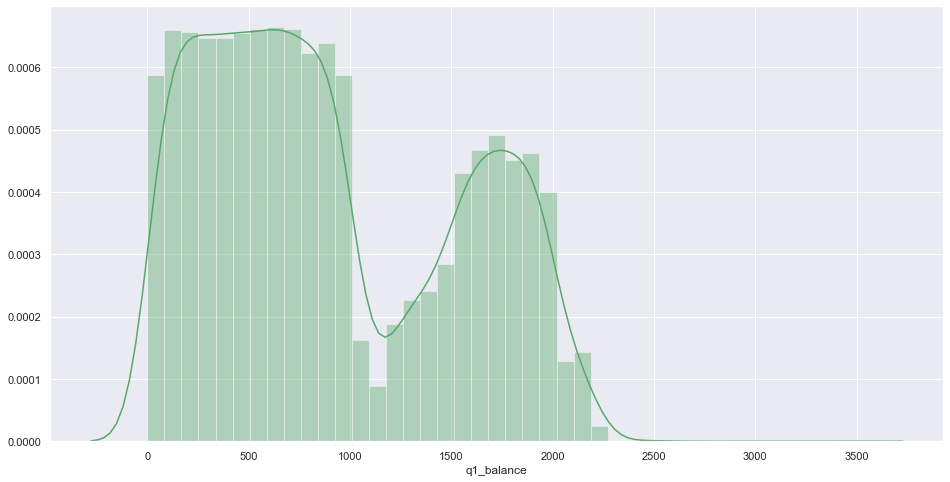

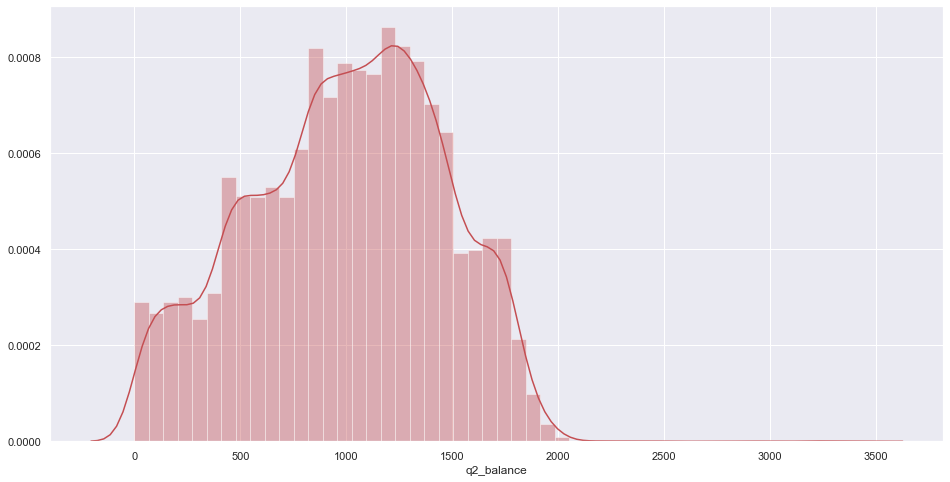

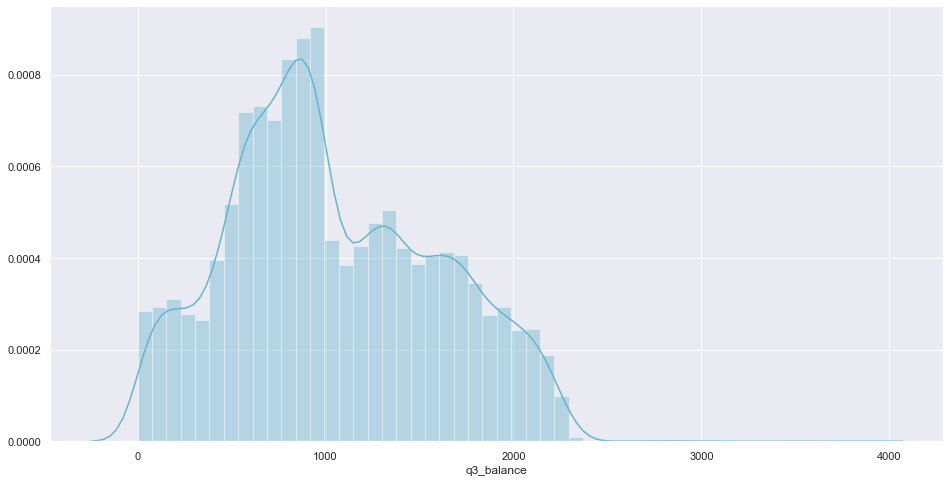

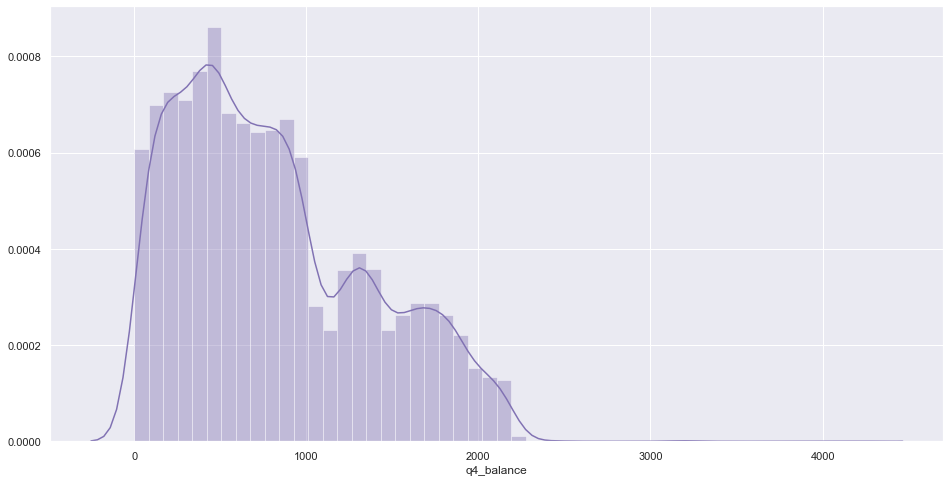

In [34]:
df_hist(continuous_df)

###### Check for outliers of continuous variables

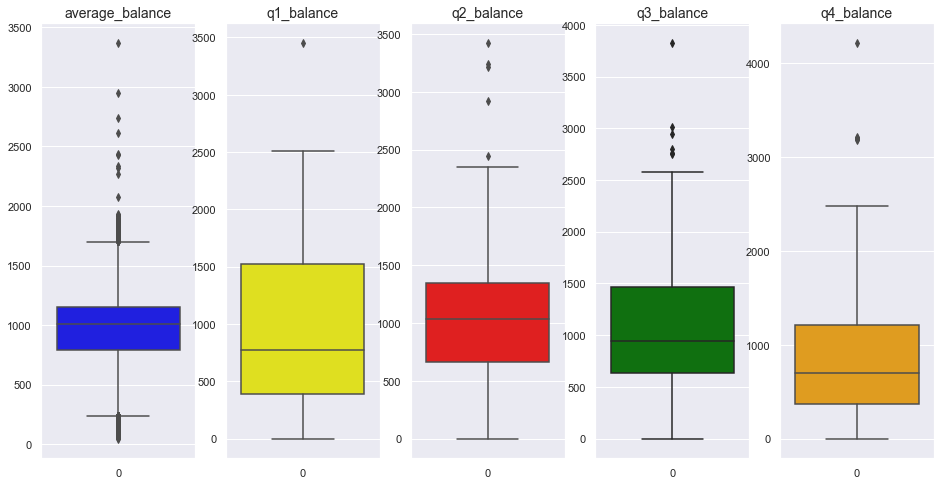

In [35]:
box_colors = ["blue", "yellow", "red", "green", "orange"]

f, ax = plt.subplots(1, 5, figsize=(16,8))


for i, col in enumerate(continuous[:]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

Significant no. of outliers in average_balance!

# Feature extraction

In [36]:
categorical_df.head()

,reward,mailer_type,income,overdraft_protection,credit_rating,own_your_home
0,Air Miles,Letter,High,No,High,No
1,Air Miles,Letter,Medium,No,Medium,Yes
2,Air Miles,Postcard,High,No,Medium,Yes
3,Air Miles,Letter,Medium,No,High,No
4,Air Miles,Letter,Medium,No,Medium,Yes


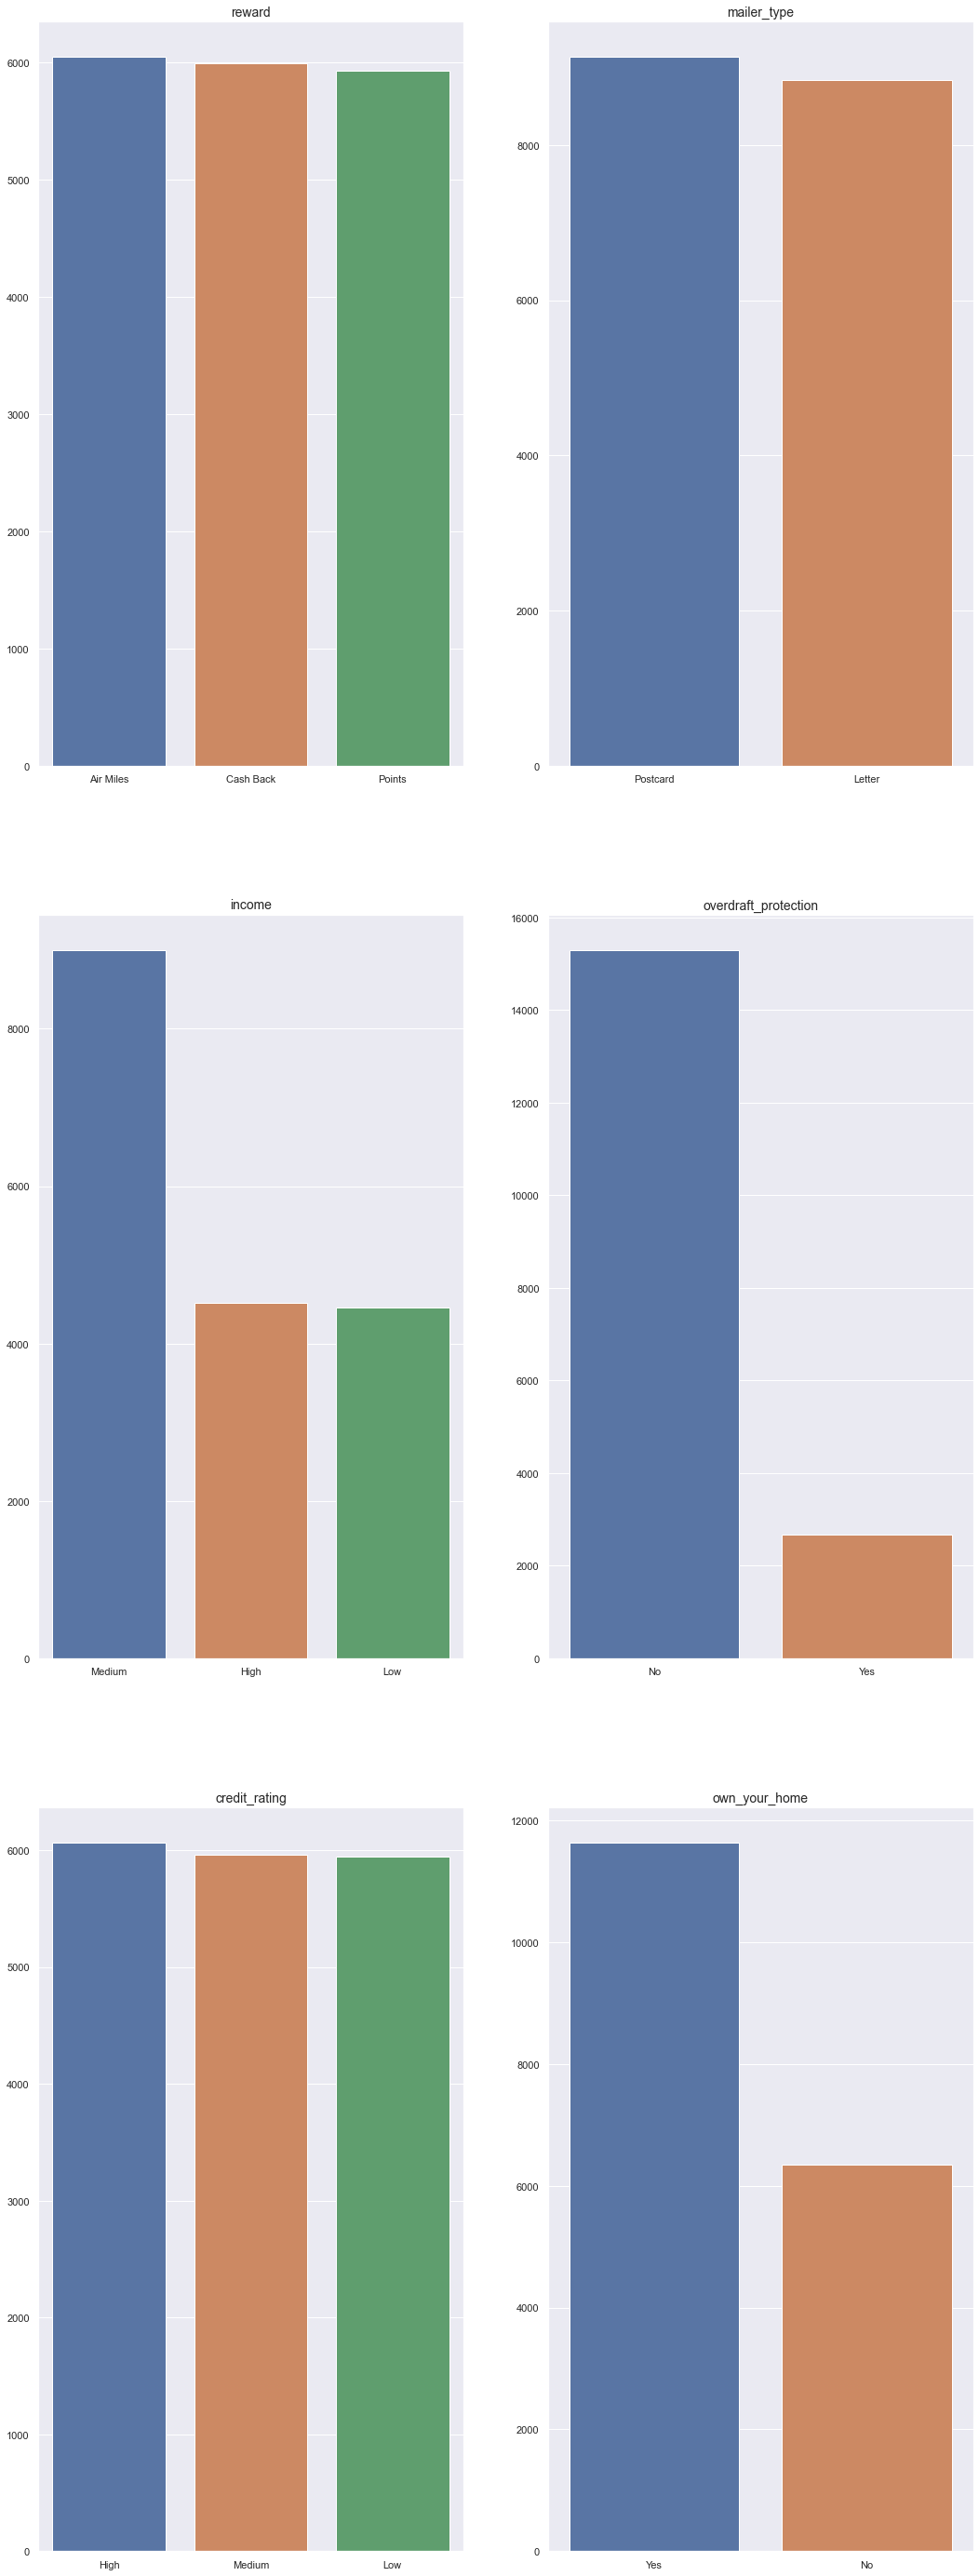

In [37]:
f, axes = plt.subplots(int(categorical_df.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

# Data cleaning and wrangling

In [38]:
# No NaNs so just remove outliers (normalization method)
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [39]:
avg_outliers = outliers(credit_df["average_balance"])

In [40]:
to_drop = avg_outliers.index 

In [41]:
clean_credit_df = credit_df.drop(to_drop).reset_index(drop = True)
clean_credit_df

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669,877,1095,1002
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78,366
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367,352,145,242
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578,1760,1119,419
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140,1357,982,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136,65,71,398
17962,0,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984,940,943,535
17963,0,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918,767,1170,1494
17964,0,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626,983,865,1615


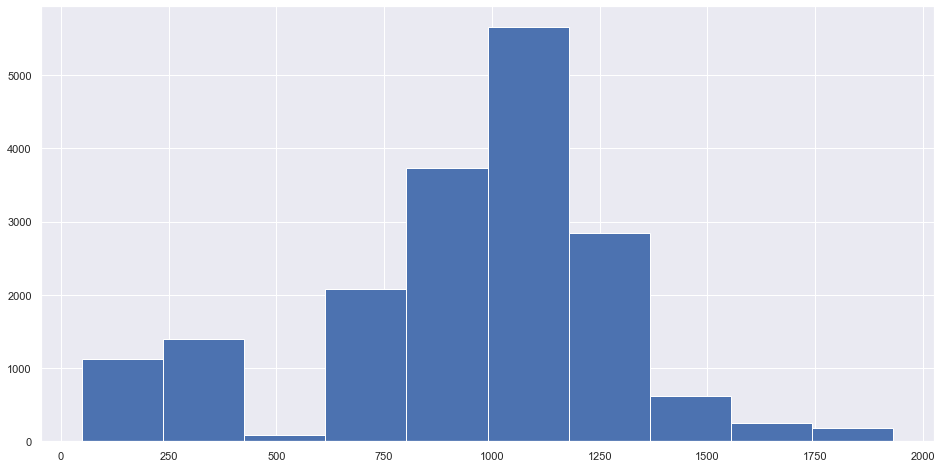

In [42]:
# Much better
clean_credit_df["average_balance"].hist();

# Data Wrangling

In [43]:
# Create copy
df_copy = clean_credit_df.copy()

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17966 non-null  int64  
 1   reward                17966 non-null  object 
 2   mailer_type           17966 non-null  object 
 3   income                17966 non-null  object 
 4   accounts_open         17966 non-null  int64  
 5   overdraft_protection  17966 non-null  object 
 6   credit_rating         17966 non-null  object 
 7   cards_held            17966 non-null  int64  
 8   homes_owned           17966 non-null  int64  
 9   household_size        17966 non-null  int64  
 10  own_your_home         17966 non-null  object 
 11  average_balance       17966 non-null  float64
 12  q1_balance            17966 non-null  int64  
 13  q2_balance            17966 non-null  int64  
 14  q3_balance            17966 non-null  int64  
 15  q4_balance         

## Numerical 

### Continuous

In [45]:
continuous

['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

In [46]:
# normalising continuous variables (but target)

for cont_var in continuous:
    maximum = clean_credit_df[cont_var].max()
    minimum = clean_credit_df[cont_var].min()
    clean_credit_df[cont_var] = clean_credit_df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [47]:
clean_credit_df[continuous].head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0.590577,0.758636,0.438719,0.476294,0.311374
1,0.052555,0.017727,0.053027,0.033928,0.113735
2,0.121168,0.166818,0.176088,0.063071,0.075202
3,0.621500,0.717273,0.880440,0.486733,0.130205
4,0.617253,0.972727,0.678839,0.427142,0.113424


## Categorical

In [48]:
clean_credit_df

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,0.590577,0.758636,0.438719,0.476294,0.311374
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,0.052555,0.017727,0.053027,0.033928,0.113735
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,0.121168,0.166818,0.176088,0.063071,0.075202
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.621500,0.717273,0.880440,0.486733,0.130205
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.617253,0.972727,0.678839,0.427142,0.113424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,0.063305,0.061818,0.032516,0.030883,0.123679
17962,0,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,0.425879,0.447273,0.470235,0.410178,0.166252
17963,0,Cash Back,Letter,High,1,No,Low,2,1,4,No,0.551559,0.417273,0.383692,0.508917,0.464264
17964,0,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,0.517054,0.284545,0.491746,0.376251,0.501865


## Ordinal Encoding

In [49]:

ordinal = clean_credit_df
ordinal

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,0.590577,0.758636,0.438719,0.476294,0.311374
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,0.052555,0.017727,0.053027,0.033928,0.113735
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,0.121168,0.166818,0.176088,0.063071,0.075202
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.621500,0.717273,0.880440,0.486733,0.130205
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.617253,0.972727,0.678839,0.427142,0.113424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,0.063305,0.061818,0.032516,0.030883,0.123679
17962,0,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,0.425879,0.447273,0.470235,0.410178,0.166252
17963,0,Cash Back,Letter,High,1,No,Low,2,1,4,No,0.551559,0.417273,0.383692,0.508917,0.464264
17964,0,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,0.517054,0.284545,0.491746,0.376251,0.501865


In [50]:
ordinal.info() # Types changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17966 non-null  int64  
 1   reward                17966 non-null  object 
 2   mailer_type           17966 non-null  object 
 3   income                17966 non-null  object 
 4   accounts_open         17966 non-null  int64  
 5   overdraft_protection  17966 non-null  object 
 6   credit_rating         17966 non-null  object 
 7   cards_held            17966 non-null  int64  
 8   homes_owned           17966 non-null  int64  
 9   household_size        17966 non-null  int64  
 10  own_your_home         17966 non-null  object 
 11  average_balance       17966 non-null  float64
 12  q1_balance            17966 non-null  float64
 13  q2_balance            17966 non-null  float64
 14  q3_balance            17966 non-null  float64
 15  q4_balance         

In [51]:
ordinal.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income', 'accounts_open',
       'overdraft_protection', 'credit_rating', 'cards_held', 'homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

In [52]:
ordinal

,offer_accepted,reward,mailer_type,income,accounts_open,overdraft_protection,credit_rating,cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,0.590577,0.758636,0.438719,0.476294,0.311374
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,0.052555,0.017727,0.053027,0.033928,0.113735
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,0.121168,0.166818,0.176088,0.063071,0.075202
3,0,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.621500,0.717273,0.880440,0.486733,0.130205
4,0,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.617253,0.972727,0.678839,0.427142,0.113424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,0.063305,0.061818,0.032516,0.030883,0.123679
17962,0,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,0.425879,0.447273,0.470235,0.410178,0.166252
17963,0,Cash Back,Letter,High,1,No,Low,2,1,4,No,0.551559,0.417273,0.383692,0.508917,0.464264
17964,0,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,0.517054,0.284545,0.491746,0.376251,0.501865


In [53]:
one_hot = ordinal.copy()

In [54]:
# One hot encoders


one_hot_colums = ['reward', 'mailer_type', 'income','overdraft_protection', 'credit_rating', 'own_your_home',]

In [55]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)
one_hot

,offer_accepted,accounts_open,cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_High,income_Low,income_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes
0,0,1,2,1,4,0.590577,0.758636,0.438719,0.476294,0.311374,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,1,2,2,5,0.052555,0.017727,0.053027,0.033928,0.113735,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,0,2,2,1,2,0.121168,0.166818,0.176088,0.063071,0.075202,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1
3,0,2,1,1,4,0.621500,0.717273,0.880440,0.486733,0.130205,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0
4,0,1,2,1,6,0.617253,0.972727,0.678839,0.427142,0.113424,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,1,1,1,5,0.063305,0.061818,0.032516,0.030883,0.123679,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17962,0,1,3,1,3,0.425879,0.447273,0.470235,0.410178,0.166252,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17963,0,1,2,1,4,0.551559,0.417273,0.383692,0.508917,0.464264,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
17964,0,1,4,2,2,0.517054,0.284545,0.491746,0.376251,0.501865,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1


In [56]:
final_df = one_hot.copy()

In [57]:
#Applying panda numerics to the data frame

final_df.apply(pd.to_numeric)

,offer_accepted,accounts_open,cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_High,income_Low,income_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes
0,0,1,2,1,4,0.590577,0.758636,0.438719,0.476294,0.311374,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,1,2,2,5,0.052555,0.017727,0.053027,0.033928,0.113735,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,0,2,2,1,2,0.121168,0.166818,0.176088,0.063071,0.075202,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1
3,0,2,1,1,4,0.621500,0.717273,0.880440,0.486733,0.130205,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0
4,0,1,2,1,6,0.617253,0.972727,0.678839,0.427142,0.113424,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0,1,1,1,5,0.063305,0.061818,0.032516,0.030883,0.123679,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17962,0,1,3,1,3,0.425879,0.447273,0.470235,0.410178,0.166252,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17963,0,1,2,1,4,0.551559,0.417273,0.383692,0.508917,0.464264,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
17964,0,1,4,2,2,0.517054,0.284545,0.491746,0.376251,0.501865,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1


# Logistic Regression with random sampling as to control our Imbalance

In [58]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


#Creating a random under sample
rus = RandomUnderSampler()
X = final_df[['accounts_open','cards_held','homes_owned', 'q4_balance', 'q1_balance', 'q3_balance', 'q2_balance',
       'household_size', 'mailer_type_Letter', 'mailer_type_Postcard',
       'income_High', 'income_Low', 'income_Medium', 'credit_rating_High', 'credit_rating_Low',
       'credit_rating_Medium', 'own_your_home_No', 'own_your_home_Yes']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = final_df['offer_accepted']
X_rus, y_rus = rus.fit_sample(X, y)

#x- y split and applying the model
X_train, X_test, y_train, y_test = train_test_split(X_rus,
                                                    y_rus, test_size=0.25,
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

y_pred = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


Text(0.5, 1.0, 'Confusion Matrix')

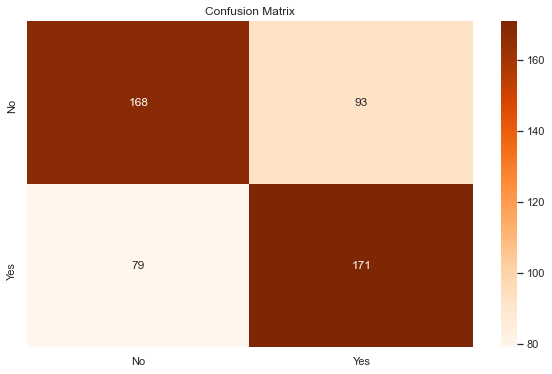

In [59]:
#Plotting the confustion matrix 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, cmap= 'Oranges', annot=True, fmt='g').set_title('Confusion Matrix')

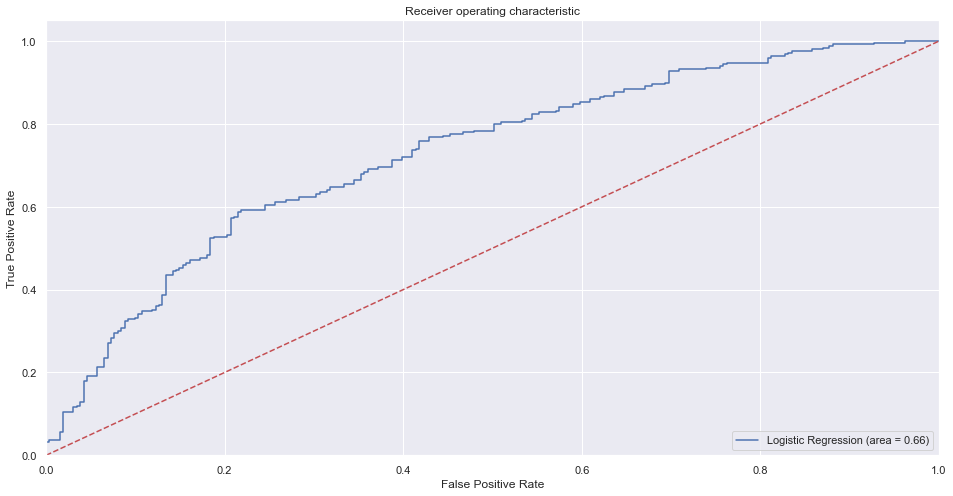

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()